<a href="https://colab.research.google.com/github/Codeventure-team6/Proyek-codeventure/blob/vidky/Analisi_Jenis_%26_penjualan_buah_(%2BJogja).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1. Melakukan import library Pandas
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Menggabungkan data dari cabang jogja dan seluruh cabang
data_all_cabang = pd.read_csv('https://raw.githubusercontent.com/Codeventure-team6/Proyek-codeventure/refs/heads/master/dataset/Fruit%20Sales%20Data.csv')
data_jogja = pd.read_csv('https://raw.githubusercontent.com/Codeventure-team6/Proyek-codeventure/refs/heads/master/dataset/Fruit%20Sales%20Data%20Branch%20Jogja.csv')

data_all= pd.concat([data_all_cabang, data_jogja])
data_all

,Fruit_Name,Weight_in_Kg,Total_Cost,Purchased
0,Apple,44.0,72000.0,No
1,Mango,27.0,48000.0,Yes
2,Orange,30.0,54000.0,No
3,Strawberry,38.0,61000.0,No
4,Orange,40.0,NaN,Yes
5,Mango,35.0,58000.0,Yes
6,Apple,NaN,52000.0,No
7,Strawberry,48.0,79000.0,Yes
8,Strawberry,50.0,83000.0,No
9,Apple,37.0,67000.0,Yes


In [ ]:
# Pembersihan data

# Membersihkan data yang wight dan total nya 0
df_clean = data_all.dropna(subset=['Total_Cost'])
df_clean = df_clean.dropna(subset=['Weight_in_Kg'])
df_clean

,Fruit_Name,Weight_in_Kg,Total_Cost,Purchased
0,Apple,44.0,72000.0,No
1,Mango,27.0,48000.0,Yes
2,Orange,30.0,54000.0,No
3,Strawberry,38.0,61000.0,No
5,Mango,35.0,58000.0,Yes
7,Strawberry,48.0,79000.0,Yes
8,Strawberry,50.0,83000.0,No
9,Apple,37.0,67000.0,Yes
10,Orange,47.0,63000.0,No
12,Mango,46.0,76000.0,No


In [ ]:
# Menjumlahkan berat berdasarkan nama buah
fruit_weights = df_clean.groupby("Fruit_Name")["Weight_in_Kg"].sum()
fruit_weights

,Weight_in_Kg
Fruit_Name,
Apple,176.0
Avocado,21.0
Durian,80.0
Mango,108.0
Melon,30.0
Orange,176.0
Strawberry,136.0


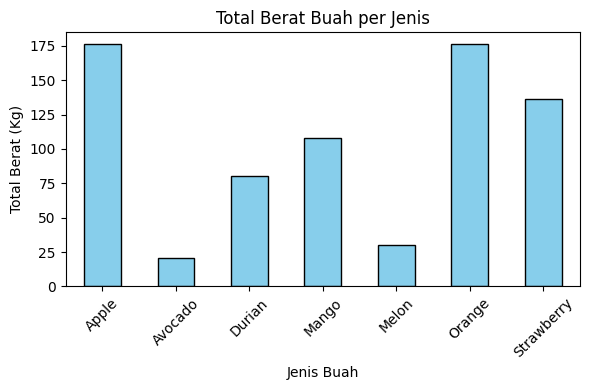

In [ ]:
# Gambar grafik batang
plt.figure(figsize=(6, 4))
fruit_weights.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Total Berat Buah per Jenis")
plt.xlabel("Jenis Buah")
plt.ylabel("Total Berat (Kg)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
cost_per_fruit = df_clean.groupby('Fruit_Name')['Total_Cost'].sum()
cost_per_fruit

,Total_Cost
Fruit_Name,
Apple,282000.0
Avocado,38500.0
Durian,155000.0
Mango,182000.0
Melon,117000.0
Orange,214000.0
Strawberry,223000.0


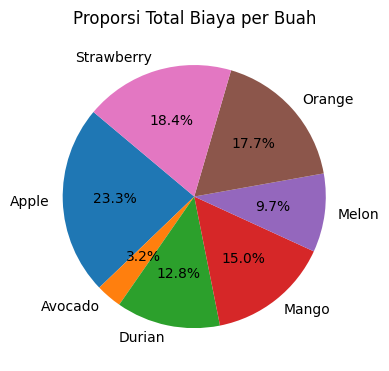

In [ ]:
# Gambar pie chart pengelompokkan buah berdasarkan Purchased
plt.figure(figsize=(4, 4))
cost_per_fruit.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Proporsi Total Biaya per Buah')
plt.ylabel('')
plt.tight_layout()
plt.show()